# 1. Autoencoder

In [ ]:
import keras
from keras import layers
from keras.datasets import cifar10
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as tfk

In [ ]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [ ]:
x_train = (x_train/255).astype('float32')
x_test = (x_test/255).astype('float32')
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [ ]:
x_train = x_train.reshape(x_train.shape[0], 32, 32, 3)  
x_test = x_test.reshape(x_test.shape[0], 32, 32, 3)
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [ ]:
input_img=keras.Input(shape=(32,32,3))
encoding_dim=32
encoded=layers.Dense(encoding_dim,activation='relu')(input_img)
decoded=layers.Dense(3,activation='sigmoid')(encoded)
autoencoder=keras.Model(input_img,decoded)


In [ ]:
autoencoder=tfk.Sequential()
tfkl=tfk.layers
autoencoder.add(tfkl.Conv2D(filters = 32, kernel_size=3, strides=1, 
                      padding="same", activation='relu', input_shape=(32,32,3)))
autoencoder.add(tfkl.BatchNormalization())
autoencoder.add(tfkl.Conv2D(filters = 32, kernel_size=3, strides=2, 
                      padding="same", activation='relu'))
autoencoder.add(tfkl.Conv2D(filters = 32, kernel_size=3, strides=1, 
                      padding="same", activation='relu'))
autoencoder.add(tfkl.BatchNormalization())
autoencoder.add(tfkl.UpSampling2D())
autoencoder.add(tfkl.Conv2D(filters = 32, kernel_size=3, strides=1, 
                      padding="same", activation='relu'))
autoencoder.add(tfkl.BatchNormalization())
autoencoder.add(tfkl.Conv2D(3,kernel_size=1, strides=1, padding='same', activation='sigmoid'))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 16, 16, 32)        128       
_________________________________________________________________
up_sampling2d (UpSampling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        9

In [ ]:
result=autoencoder.fit(x_train, x_train, epochs=20, steps_per_epoch=10, batch_size=128)

Epoch 1/20
10/10 [==============================] - 5s 510ms/step - loss: 0.6637 - accuracy: 0.4166
Epoch 2/20
10/10 [==============================] - 5s 512ms/step - loss: 0.5865 - accuracy: 0.5028
Epoch 3/20
10/10 [==============================] - 5s 513ms/step - loss: 0.5695 - accuracy: 0.5428
Epoch 4/20
10/10 [==============================] - 5s 513ms/step - loss: 0.5698 - accuracy: 0.6016
Epoch 5/20
10/10 [==============================] - 5s 511ms/step - loss: 0.5609 - accuracy: 0.6295
Epoch 6/20
10/10 [==============================] - 5s 512ms/step - loss: 0.5638 - accuracy: 0.6509
Epoch 7/20
10/10 [==============================] - 5s 514ms/step - loss: 0.5582 - accuracy: 0.6626
Epoch 8/20
10/10 [==============================] - 5s 512ms/step - loss: 0.5604 - accuracy: 0.6777
Epoch 9/20
10/10 [==============================] - 5s 512ms/step - loss: 0.5598 - accuracy: 0.6792
Epoch 10/20
10/10 [==============================] - 5s 512ms/step - loss: 0.5570 - accuracy: 0.6938

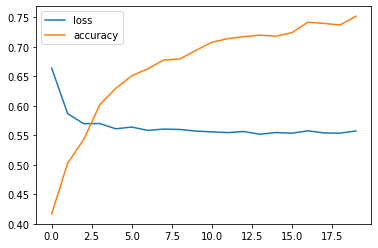

In [ ]:
plt.plot(result.history['loss'])
plt.plot(result.history['accuracy'])
plt.legend(labels=['loss','accuracy'])

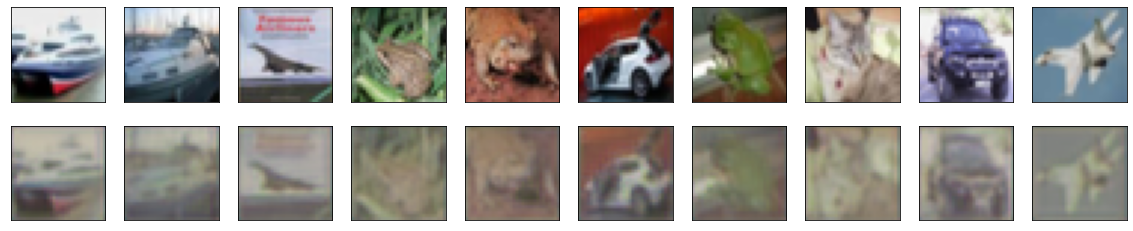

In [ ]:
n =10
plt.figure(figsize=(20,4))

for i in range(1, n + 1):
    
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    #predict
    ax = plt.subplot(2, n, i + n)
    plt.imshow(autoencoder.predict(x_test)[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# 2.1 Deep CNN

In [ ]:
layers = tfk.layers
model1= tfk.Sequential()

In [ ]:
model1.add(layers.Conv2D(filters=64, kernel_size=(3,3), strides=(1,1),padding='valid', activation='relu', input_shape=(32,32,3))) 
model1.add(layers.MaxPooling2D(pool_size=(2,2)))
model1.add(layers.Dropout(0.25))

model1.add(layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1),padding='valid', activation='relu'))
model1.add(layers.MaxPooling2D(pool_size=(2, 2)))
model1.add(layers.Dropout(0.25))

model1.add(layers.Flatten())
model1.add(layers.Dense(64, activation='relu'))
model1.add(layers.Dropout(0.5))
model1.add(layers.Dense(10, activation='softmax'))

model1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 30, 30, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 13, 13, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1152)             

In [ ]:
model1.compile(optimizer='rmsprop', loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
from keras.utils import to_categorical
train_label=to_categorical(y_train)
test_label=to_categorical(y_test)

In [ ]:
result2=model1.fit(x_train,train_label,steps_per_epoch=100,epochs=20, batch_size=128, validation_data=(x_test,test_label))

Epoch 1/20
100/100 [==============================] - 23s 228ms/step - loss: 2.1396 - accuracy: 0.2042 - val_loss: 1.9287 - val_accuracy: 0.3525
Epoch 2/20
100/100 [==============================] - 23s 227ms/step - loss: 1.9110 - accuracy: 0.3097 - val_loss: 1.7930 - val_accuracy: 0.3550
Epoch 3/20
100/100 [==============================] - 23s 228ms/step - loss: 1.7910 - accuracy: 0.3486 - val_loss: 1.6380 - val_accuracy: 0.4169
Epoch 4/20
100/100 [==============================] - 23s 226ms/step - loss: 1.7033 - accuracy: 0.3844 - val_loss: 1.5288 - val_accuracy: 0.4684
Epoch 5/20
100/100 [==============================] - 23s 226ms/step - loss: 1.6427 - accuracy: 0.4100 - val_loss: 1.4947 - val_accuracy: 0.4746
Epoch 6/20
100/100 [==============================] - 23s 228ms/step - loss: 1.5887 - accuracy: 0.4221 - val_loss: 1.4891 - val_accuracy: 0.4706
Epoch 7/20
100/100 [==============================] - 23s 229ms/step - loss: 1.5561 - accuracy: 0.4335 - val_loss: 1.5145 - val_ac

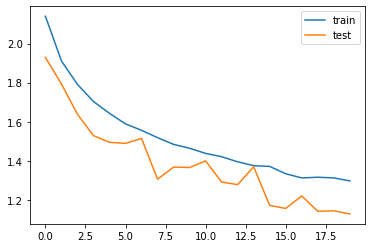

In [ ]:
plt.plot(result2.history['loss'])
plt.plot(result2.history['val_loss'])
plt.legend(labels=['train','test'])

# 2.2 Transfer Learning


In [ ]:
from tensorflow.keras.applications import VGG16
conv_base = VGG16(weights = 'imagenet', include_top = False, input_shape = (32,32,3))
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [ ]:
model2=tfk.Sequential()

In [ ]:
model2.add(conv_base)
model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dropout(0.5))
model2.add(layers.Dense(10, activation='softmax'))
model2.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                32832     
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                650       
Total params: 14,748,170
Trainable params: 14,748,170
Non-trainable params: 0
_________________________________________________________________


In [ ]:
conv_base.trainable = False
len(model2.trainable_weights)

4

In [ ]:
model2.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
result3=model2.fit(x_train, train_label, epochs=5, batch_size=64,validation_data=(x_test,test_label))

Epoch 1/5
782/782 [==============================] - 613s 783ms/step - loss: 1.3391 - accuracy: 0.5428 - val_loss: 1.2366 - val_accuracy: 0.5733
Epoch 2/5
782/782 [==============================] - 617s 789ms/step - loss: 1.3311 - accuracy: 0.5438 - val_loss: 1.2313 - val_accuracy: 0.5749
Epoch 3/5
782/782 [==============================] - 617s 789ms/step - loss: 1.3229 - accuracy: 0.5464 - val_loss: 1.2420 - val_accuracy: 0.5698
Epoch 4/5
782/782 [==============================] - 621s 794ms/step - loss: 1.3176 - accuracy: 0.5493 - val_loss: 1.2311 - val_accuracy: 0.5781
Epoch 5/5
782/782 [==============================] - 621s 794ms/step - loss: 1.3100 - accuracy: 0.5541 - val_loss: 1.2257 - val_accuracy: 0.5800


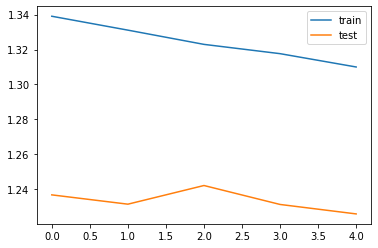

In [ ]:
plt.plot(result3.history['loss'])
plt.plot(result3.history['val_loss'])
plt.legend(labels=['train','test'])

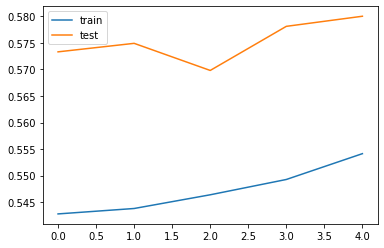

In [ ]:
plt.plot(result3.history['accuracy'])
plt.plot(result3.history['val_accuracy'])
plt.legend(labels=['train','test'])

# 3.1 RNN


In [4]:
import pandas as pd
spam = pd.read_csv('SPAM_detection.csv')

FileNotFoundError: ignored

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras import regularizers

In [ ]:
x = spam['Message']
y = spam['category_val']
x = np.asarray(x)
y = np.asarray(y)

In [ ]:
tok = Tokenizer()
tok.fit_on_texts(x)